# 고양이 수염 스티커 만들기
## 1. 정면사진

## 1) 사진 준비하기

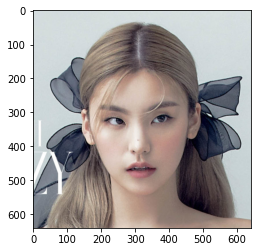

In [1]:
#필요한 라이브러러리 불러오기
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji2.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2) 얼굴 인식하기

rectangles[[(171, 260) (438, 528)]]


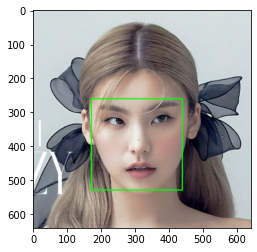

In [2]:
#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 잘라진 얼굴 이미지에서 68개의 이목구비 위치 찾기

In [3]:
#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [4]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


위의 길이 결과 68로 68개의 이목구비를 찾은 것이 확인 가능하다.

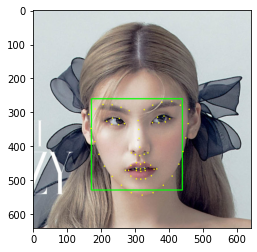

In [5]:
#랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 고양이 수염 스티커 얼굴에 적용하기

(313, 402)
(x,y): (313,402)
(w,h):(248,33)


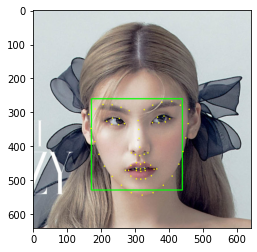

In [6]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[40][0])*4
    h = (landmark[31][1] - landmark[2][1])
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))
    
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

index를 33으로 두면 코가 너무 아래에 위치한 것처럼 보여서 적당한 위치인 30으로 index를 정했다.

(33, 248, 3)


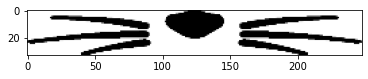

In [7]:
#준비해 둔 스티커 이미지를 읽어서 적용하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/3.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker); plt.show()

In [8]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기
refined_x = x-w//2
refined_y = y-h//2
print('(x,y):(%d, %d)'%(refined_x, refined_y))

(x,y):(189, 386)


In [9]:
#원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
if refined_x <0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (189,386)


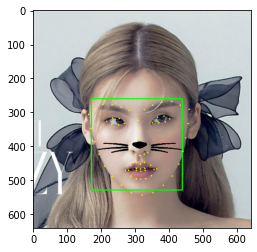

In [10]:
#원본 이미지에 스티커를 적용하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
plt.imshow(img_show)

plt.show()

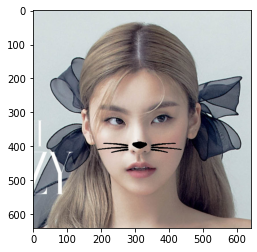

In [11]:
#box와 dot 없애기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 수염의 불투명도 조절하기

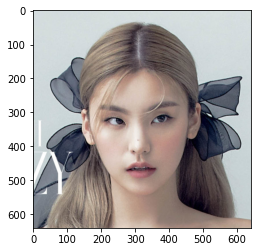

In [12]:
#카피 된 새로운 이미지 불러와서 RGB로 바꿔주기
img_bgr3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr3); plt.show()

먼저, 기존에 사용했던 카피 이미지 말고 다른 카피 이미지를 불러와 sticker_area를 새로 지정해준다.

그리고 새로만든 sticker_area2에 해당하는 원본 이미지와 img_sticker의 투명도 비율을 설정해주고 dst에 저장해준다.

sticker_area2에 해당하는 원본 사진의 비율과 img_sticker의 비율의 합은 꼭 1이 아니어도 된다. (여기선 0.85+0.2=1.05)

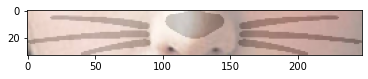

In [13]:
sticker_area2 = img_bgr3[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
dst = cv2.addWeighted(sticker_area2, 0.85, img_sticker, 0.2, 0)

plt.imshow(dst)

plt.show()

또다른 카피 이미지를 들고와서 sticker_area위치에 투명도를 조절한 dst 파일을 덧 씌워 투명도가 조절된 고양이 수염 필터를 씌운 결과물을 확인한다.

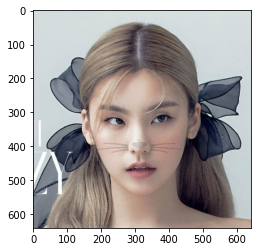

In [14]:
img_bgr2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB))
plt.show()

# 여기서 생긴 궁금증.
과연 정면 사진이 아니어도,
얼굴이 일부분 가려져 있어도 이목구비를 잘 구별해내고 코를 붙일 수 있을까?

## 2. 브이하는 사진

중요한 이목구비를 가리는 사진은 아닌 
얼굴에 브이를 하는 사진을 가져와 실행 해보았다.

rectangles[[(247, 204) (632, 590)]]


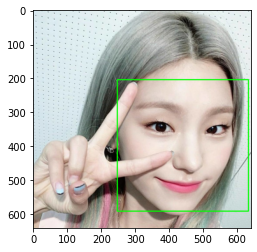

In [15]:
#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji_v.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

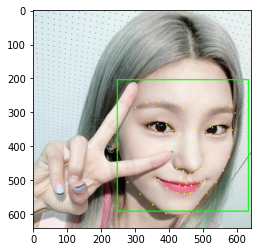

In [16]:
#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
#랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [17]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[39][0] - landmark[36][0])*4
    h = (landmark[31][1] - landmark[1][1])*2
    
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

(472, 457)


(208, 280, 3)


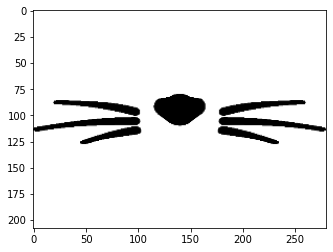

In [18]:
#준비해 둔 스티커 이미지를 읽어서 적용하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/1.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker); plt.show()

In [19]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기
refined_x = x-w//2
refined_y = y-h//2

#원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
if refined_x <0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

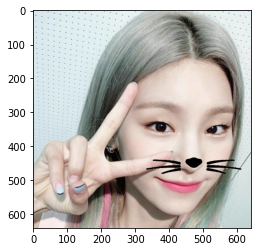

In [20]:
#원본 이미지에 스티커를 적용하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#box와 dot 없애기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

손가락이 얼굴 일부를 가리고 있지만, 중요한 이목구비를 가리고 있는 것은 아니어서 그런지 68개의 이목구비도 잘 검출 되었고, 코도 잘 붙어있는 것을 확인할 수 있다.

그렇다면, 코부터 하관을 모두 가리는 마스크를 쓴 사진을 가져오면 이목구비 검출과 고양이 코는 어떻게 될까?

## 3. 마스크를 쓴 사진

rectangles[[(191, 217) (414, 440)]]


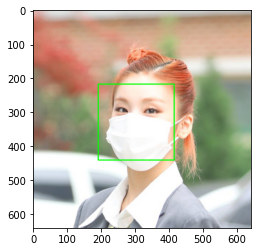

In [21]:
#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji_m.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68
(287, 342)
(x,y): (287,342)
(w,h):(80,14)


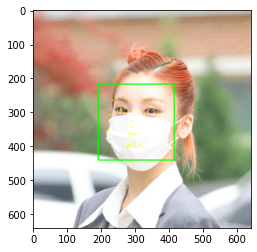

In [22]:
#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[40][0])*4
    h = (landmark[31][1] - landmark[2][1])*2
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))
    
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

(14, 80, 3)


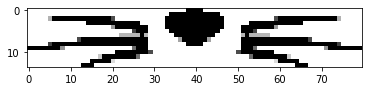

In [23]:
#준비해 둔 스티커 이미지를 읽어서 적용하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/3.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker); plt.show()

In [24]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기
refined_x = x-w//2
refined_y = y-h//2
print('(x,y):(%d, %d)'%(refined_x, refined_y))

#원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
if refined_x <0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y):(247, 335)
(x,y) : (247,335)


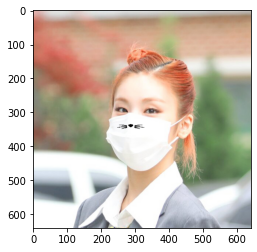

In [25]:
#원본 이미지에 스티커를 적용하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
#box와 dot 없애기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

어떻게 된 건지 마스크를 썼음에도 알아서 턱선, 코 위치, 입술 위치를 찾아내 이목구비를 검출해내고, 코도 적당한 위치에 잘 붙은 것을 확인할 수 있다.

-> 얼굴의 반이 가려져 있어도 정확하게는 아닐지라도 이목구비 검출이 정상적으로 된다는 것을 알 수 있다.

## 4. 사선으로 기운 얼굴

얼굴이 사선으로 기울어진 상태라면 고양이 코를 붙였을 때 어떻게 될까?

rectangles[[(241, 241) (562, 562)]]


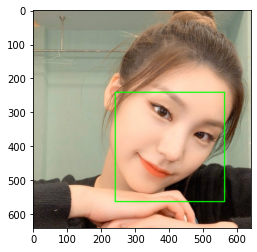

In [26]:
#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji_a.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

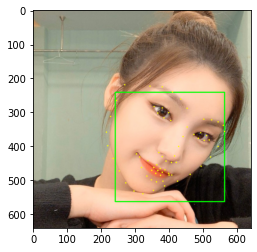

In [27]:
#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
    #랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [28]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[42][0] - landmark[40][0])*4
    h = (landmark[31][1] - landmark[2][1])*2
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))
    
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

(415, 428)
(x,y): (415,428)
(w,h):(352,212)


(212, 352, 3)


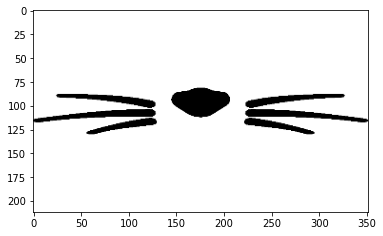

In [29]:
#준비해 둔 스티커 이미지를 읽어서 적용하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/1.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker); plt.show()

In [30]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기
refined_x = x-w//2
refined_y = y-h//2

#원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
if refined_x <0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

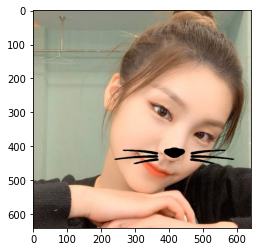

In [31]:
#원본 이미지에 스티커를 적용하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


#box와 dot 없애기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

역시 이목구비 검출은 잘 되었지만, 기대와는 달리 코가 각도에 알맞게 붙지 않고 사진 모양과 평행하게 붙어있는 것을 알 수 있다. 짜여 있는 코드로는 코를 기울일 수 없고, 코를 기울게 하는 코드를 따로 짜서 넣어야하는 것 같다.

## 5. 얼굴 옆면

앞의 세 경우를 생각하니 옆 얼굴 사진을 들고와도 이목구비 검출이 잘 되고 코도 잘 붙을 것 같다.

rectangles[[(204, 162) (589, 547)]]


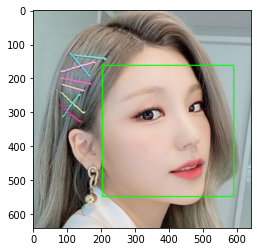

In [32]:
#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji_s.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

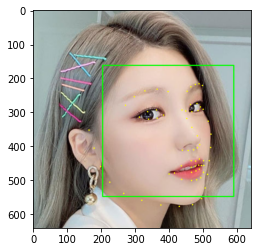

In [33]:
#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
#랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [34]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[39][0] - landmark[36][0])*4
    h = (landmark[31][1] - landmark[0][1])*2
    
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

(482, 369)


(118, 284, 3)


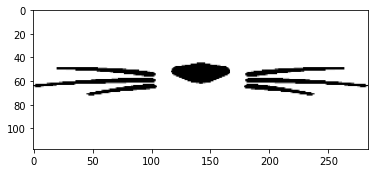

In [35]:
#준비해 둔 스티커 이미지를 읽어서 적용하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/1.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker); plt.show()

In [36]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기
refined_x = x-w//2
refined_y = y-h//2

#원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
if refined_x <0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

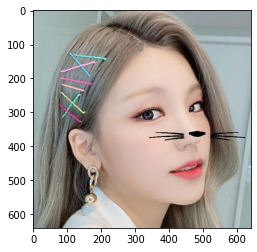

In [37]:
#원본 이미지에 스티커를 적용하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#box와 dot 없애기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

코의 각도가 안 맞는 것은 물론이고, 생각과는 달리 코를 붙이는 위치가 참 애매했다. 
지금 이 사진의 코의 위치인 30번이 애매해서 33, 32, 29로 각각 실행해봤는데 그나마 30번이 가장 위치가 알맞았다.

고양이 코를 조금 기울게 만들어 보자

# 6. 기울어진 얼굴에 맞게 고양이 코 각도 변경

rectangles[[(241, 206) (562, 527)]]
68


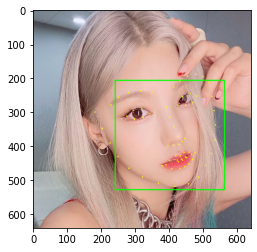

In [38]:
#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji_a2.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)

plt.show()

In [39]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[42][0] - landmark[40][0])*4
    h = (landmark[31][1] - landmark[0][1])*2
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))
    
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


(424, 371)
(x,y): (424,371)
(w,h):(408,198)


(198, 408, 3)


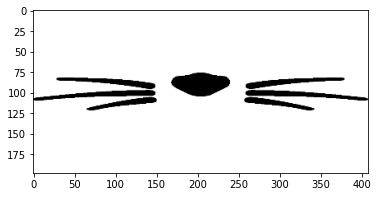

In [40]:
#준비해 둔 스티커 이미지를 읽어서 적용하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/1.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker); plt.show()


In [41]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기
refined_x = x-w//2
refined_y = y-h//2
print('(x,y):(%d, %d)'%(refined_x, refined_y))

#원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
if refined_x <0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y):(220, 272)
(x,y) : (220,272)


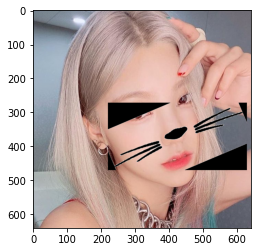

In [42]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

height, width, channel = img_sticker.shape

dst = cv2.getRotationMatrix2D((width/2, height/2), 23, 1)
img_sticker = cv2.warpAffine(img_sticker, dst, (width, height))

img_bgr3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

고양이 코는 입력한 각도 23도에 맞게 잘 기울어졌지만, 앞서 설정해준 x, y 좌표가 정방향 직사각형으로 그대로라, 이미지 스티커 외의 공간이 검은색으로 남아버렸다.

이미지 스티커 외의 공간을 무시하거나 투명화시키는 방법이나, x, y 좌표 또한 23도 기울기에 맞게 기울어지게 하는 방법이 필요할 것 같다.

# 6.1. 얼굴 각도를 자동으로 계산하고 그 각도를 고양이 콧수염 각도에 적용시키기

rectangles[[(111, 260) (379, 528)]]
68


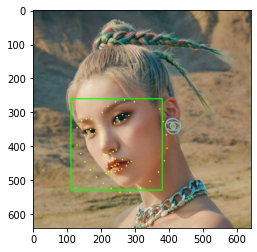

In [43]:
#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji_a3.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)

plt.show()

In [44]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[42][0] - landmark[40][0])*4
    h = (landmark[31][1] - landmark[17][1])*2
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))
    
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


(208, 393)
(x,y): (208,393)
(w,h):(260,156)


(156, 260, 3)


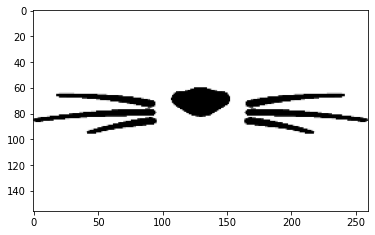

In [45]:
#준비해 둔 스티커 이미지를 읽어서 적용하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/1.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker); plt.show()


In [46]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기
refined_x = x-w//2
refined_y = y-h//2
print('(x,y):(%d, %d)'%(refined_x, refined_y))

#원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
if refined_x <0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y):(78, 315)
(x,y) : (78,315)


이미지가 기울어진 각도: -30.96


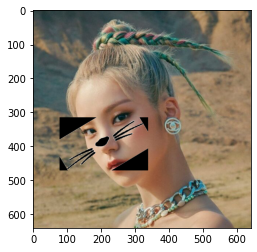

In [47]:
import math
 
#카피 된 새로운 이미지 불러와서 RGB로 바꿔주기

# 스티커가 들어갈 영역입니다.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 이미지에서 얼굴의 회전 각도를 구합니다. 
height, width, channel = img_sticker.shape
angle = math.atan(h/w)/math.pi*180
print("이미지가 기울어진 각도:", -round(angle,2))

# 각도에 맞춰 스티커를 회전시킵니다.
# 시계 방향으로 기울어져 있기 때문에 -를 붙입니다. 
matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
img_sticker = cv2.warpAffine(img_sticker, matrix, (width, height))

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

6.에서는 각도를 직접 입력해줬는데, 이번에는 math 모듈을 불러와서 이미지의 기울어진 정도를 계산했다. 얼굴이 기울어진 각도가 알맞게 나왔다는 것을 잘 붙여진 콧수염을 통해서 알 수 있다.

# +) 그럼 이미지의 기울기가 90도가 넘어가는 사진은 얼굴 인식이 제대로 될까?

rectangles[[(378, 345) (453, 420)]]
68


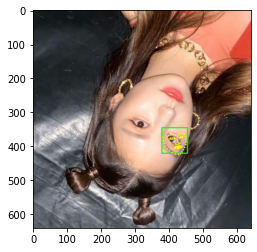

In [48]:
#준비한 이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/yeji_h.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))

img_show = img_bgr.copy()
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

#cv는 BGR을 사용하기 때문에 plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#dlib을 활용해 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector() 

#detector_hog를 이용해서 얼굴의 bounding box를 추출하기
dlib_rects = detector_hog(img_rgb, 1)


#찾은 얼굴을 화면에 출력하기
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#이목구비 찾기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

아쉽게도 사진이 기울어진 각도가 둔각이 되니 얼굴을 제대로 인식하지 못하는 것을 알 수 있다.

# 회고

1. 얼굴 일부분이 아닌 얼굴 반이 물체나 손으로 가려져 있어도 이목구비를 잘 판별해낼 수 있었다.
2. 옆 얼굴 같은 경우, 코가 붙을 수 있는 위치가 애매해서 콧수염의 양쪽 사이즈를 각도에 따라 다르게 변형하는 코드를 짜거나, 이목구비를 68개가 아닌 더 많은 숫자로 판별해낼 수 있게 하는 것이 필요할 것 같다.
3. 얼굴 각도가 틀어지면 각도에 따라 콧수염이 움직이는 것이 아니라 사진과 평행한 방향으로 어색하게 붙어있는 것을 확인할 수 있다.
4. 코의 각도를 기울게 만들 수는 있지만, x, y의 좌표가 그대로라, 이미지 스티커의 기울어진 공간과, x,y 좌표의 공간이 맞물리지 않고 남게 되는 공간은 검은색으로 남는 아쉬움이 있었다.
5. 이미지가 기울어진 정도를 계산하게 하여 콧수염을 그 기울기에 맞춰 붙일 수는 있었지만, 얼굴 사진이 기울어진 각도가 둔각이 되니 모델이 얼굴을 잘 인식하지 못한다는 것이 나타났다.